In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
df = pd.read_csv('C:/Users/misherman/Documents/Promo.csv')
df.shape

(7515001, 15)

In [4]:
#find the most common upc
pd.Series(df['upc']).value_counts()

78000083160    1834
78000082160    1834
78000011800    1729
78000052160    1666
49000050110    1554
49000050100    1554
49000050140    1554
49000050150    1526
12000809940    1428
12000809990    1428
12000809950    1428
12000809960    1428
12000809970    1428
49000028910    1378
49000042550    1378
49000028900    1365
49000028920    1365
12000150170    1106
18200610300    1092
18200860310    1092
75450061090     936
75450060910     936
75450127120     936
75450093790     936
75450093840     936
75450127130     936
75450093980     936
75450061310     936
75450060930     936
71990116000     936
               ... 
75450035970       2
75450014710       2
75450064640       2
75450173870       2
75450085130       2
75450060550       2
75450084870       2
75450014690       2
11225131430       2
75450064650       2
11225139260       2
75450173370       2
75450132930       2
75450022670       2
75450174380       2
75450152470       2
75450063860       2
75450140110       2
75450037230       2


In [16]:
#create dataframe using the most common upc
dfupc = df[df['upc'].isin([78000083160])]
dfupc.shape
df.head()

,Unnamed: 0,NewVariantID,MarketDescription,locationdimensionID,StoreItemDimensionID,upc,sevendmovement,sevendavgretail,NielsenCategory,weekName,promotion,PromotionBeginDate,PromotionLength,DaysInWeek,DaysSinceLastPromo
0,2,10026179,Omaha/Council Bluffs,292,1033,25700021500,13.0,2.000000,FOOD STORAGE AND LUNCH BAG,2017-08-06,1,2015-09-16 00:00:00,7,7,NaN
1,5,10026184,Omaha/Council Bluffs,292,4010,25700003300,10.0,3.000000,FOOD STORAGE AND LUNCH BAG,2017-08-13,1,2015-07-22 00:00:00,29,7,NaN
2,16,10032766,Omaha/Council Bluffs,292,2148,41351518030,20.0,1.111428,HERB AND SPICE SEASONING,2017-07-30,1,2015-09-02 00:00:00,7,7,NaN
3,18,10026177,Omaha/Council Bluffs,292,1040,25700003500,14.0,3.000000,FOOD STORAGE AND LUNCH BAG,2017-08-20,1,2015-07-22 00:00:00,29,7,NaN
4,22,10026172,Omaha/Council Bluffs,292,831,25700003890,9.0,3.000000,FOOD STORAGE AND LUNCH BAG,2017-08-13,1,2015-07-22 00:00:00,29,7,NaN


In [29]:
df = df.rename(columns={'7dmovement': 'sevendmovement', '7davgretail': 'sevendavgretail'})

In [8]:
# find and remove entry with NaN for seven day average retail
dfupc[dfupc['sevendavgretail'].isna()]

,Unnamed: 0,NewVariantID,MarketDescription,locationdimensionID,StoreItemDimensionID,upc,sevendmovement,sevendavgretail,NielsenCategory,weekName,promotion,PromotionBeginDate,PromotionLength,DaysInWeek,DaysSinceLastPromo


In [9]:
retail_mean = dfupc['sevendavgretail'].mean()
print (retail_mean)

5.489999999999828


In [10]:
dfupc['sevendavgretail']=dfupc['sevendavgretail'].fillna(retail_mean)

In [11]:
dfupc[dfupc['sevendavgretail'].isna()]

,Unnamed: 0,NewVariantID,MarketDescription,locationdimensionID,StoreItemDimensionID,upc,sevendmovement,sevendavgretail,NielsenCategory,weekName,promotion,PromotionBeginDate,PromotionLength,DaysInWeek,DaysSinceLastPromo


In [12]:
pd.Series(dfupc['sevendmovement']).value_counts()

660.0     31
1470.0    28
1330.0    28
1498.0    27
1456.0    27
1624.0    27
1372.0    27
854.0     27
1862.0    27
1848.0    27
1106.0    27
1302.0    27
1526.0    27
3080.0    27
1064.0    27
1596.0    18
228.0     17
321.0     17
237.0     17
399.0     17
294.0     17
380.0     17
327.0     17
183.0     17
1140.0    17
348.0     17
396.0     17
285.0     17
312.0     17
315.0     17
          ..
930.0      1
3496.0     1
3591.0     1
5060.0     1
2511.0     1
2185.0     1
1748.0     1
553.0      1
1710.0     1
651.0      1
2394.0     1
2052.0     1
2088.0     1
1740.0     1
3634.0     1
3059.0     1
4508.0     1
2254.0     1
2415.0     1
735.0      1
749.0      1
1926.0     1
2889.0     1
1605.0     1
2943.0     1
2808.0     1
2376.0     1
4830.0     1
950.0      1
4922.0     1
Name: sevendmovement, Length: 283, dtype: int64

In [17]:
df1=dfupc[['PromotionLength']]
df1.head()

,PromotionLength
18419,7
18440,7
18450,7
18467,7
18484,7


In [14]:
pd.to_numeric(('sevendavgretail'), errors = 'ignore')

'sevendavgretail'

In [32]:
df1=df[['PromotionLength','sevendmovement']]
df1.shape

(7515001, 2)

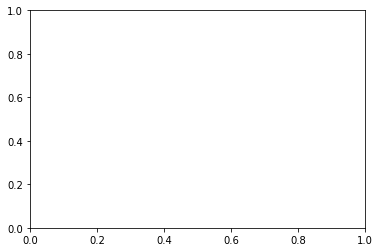

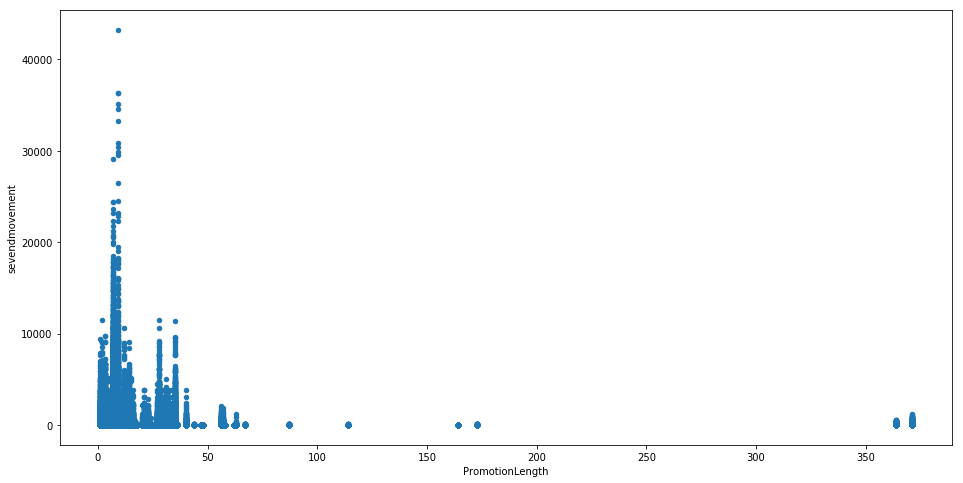

In [33]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(sharey=True)
df1.plot(kind='scatter', x='PromotionLength', y='sevendmovement', figsize=(16, 8))

In [34]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='sevendmovement ~ PromotionLength', data=df1).fit()

# print the coefficients
lm.params

Intercept          40.954902
PromotionLength    -0.124349
dtype: float64

In [35]:
# create a DataFrame with the minimum and maximum values of seven day average retail
X_new = pd.DataFrame({'PromotionLength': [df1.PromotionLength.min(), df1.PromotionLength.max()]})
X_new.head()

,PromotionLength
0,1
1,371


In [36]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

0    40.830553
1    -5.178546
dtype: float64

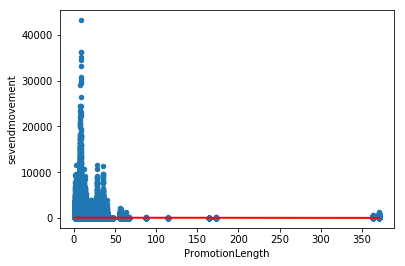

In [37]:
# first, plot the observed data
df1.plot(kind='scatter', x='PromotionLength', y='sevendmovement')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

In [38]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         sevendmovement   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1828.
Date:                Thu, 16 Aug 2018   Prob (F-statistic):               0.00
Time:                        11:32:35   Log-Likelihood:            -5.1141e+07
No. Observations:             7515001   AIC:                         1.023e+08
Df Residuals:                 7514999   BIC:                         1.023e+08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          40.9549      0.087    471.163      0.000      40.785      41.125
PromotionLength    -0.1243      0.003    -42.760      0.000      -0.130      -0.119
==============================================================================
Omnibus:                 19840607.571   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1293738139797.829
Skew:                          31.033   Prob(JB):                         0.00
Kurtosis:                    2034.710   Cond. No.                         32.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# generate linear model using scikit-learn
# create X and y
feature_cols = ['PromotionLength']
X = dfupc[feature_cols]
y = dfupc.sevendmovement

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)

1163.175983524895
[-22.18617719]


In [26]:
# calculate the R-squared
lm.score(X, y)

0.019682504430508563